In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import dandelion as ddl
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sc.logging.print_versions()

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/NC_study/scanpy'))

# create a palette for umap
import sys
sys.path.append('/home/jovyan/NC_study/scanpy/scripts')
from tools import cmp
newcmp = cmp()

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.19.1 scipy==1.5.2 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


In [2]:
adata = sc.read_h5ad('out/adata_combined_filtered_v2.h5ad')
adata

AnnData object with n_obs × n_vars = 80102 × 915
    obs: 'sampleid', 'patient', 'sampletype', 'age_group', 'gender', 'cohort', 'batch', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'bh_pval', 'is_doublet', 'filter_rna', 'leiden', 'main_celltype', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'cohort_colors', 'gender_colors', 'hvg', 'leiden', 'leiden_colors', 'main_celltype_colors', 'neighbors', 'patient_colors', 'pca', 'sampleid_colors', 'sampletype_colors', 'temp_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
pd.crosstab(adata.obs['cohort'], adata.obs['sampletype'])

sampletype  Blood  Nasal
cohort                  
COVID       13911   9020
Healthy     25616  31555

In [4]:
adata.obs['percent_mito'] = adata.obs['percent_mito']*100

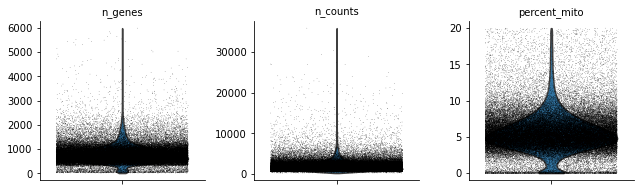

In [13]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], jitter = 0.4, size =.5, multi_panel = True)

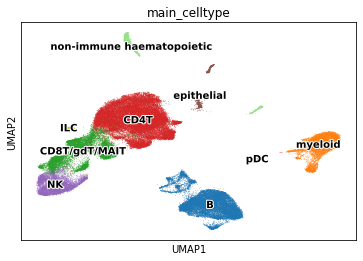

In [15]:
sc.pl.umap(adata, color = 'main_celltype', legend_loc = 'on data', legend_fontoutline = 2)

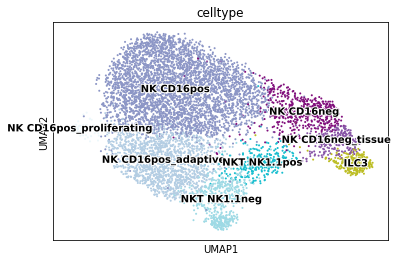

In [124]:
# subset
rna_ = adata[adata.obs['main_celltype'].isin(['NK', 'ILC'])]
rna_x = rna_.raw.to_adata()
rna_x.raw = rna_x
sc.pp.highly_variable_genes(rna_x, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
# subset to highly variable
rna_x = rna_x[:, rna_x.var['highly_variable']]
# regress and scale for PCA
sc.pp.regress_out(rna_x, ['n_counts', 'percent_mito'])
sc.pp.scale(rna_x, max_value = 10)
# Principal component analysis
sc.tl.pca(rna_x, svd_solver = 'arpack')
# # run BBKNN
sc.external.pp.bbknn(rna_x, batch_key = 'patient')
# UMAP
sc.tl.umap(rna_x, n_components = 2, min_dist = 0.3)
sc.pl.umap(rna_x, color=['celltype'], legend_loc = 'on data', legend_fontoutline = 2)

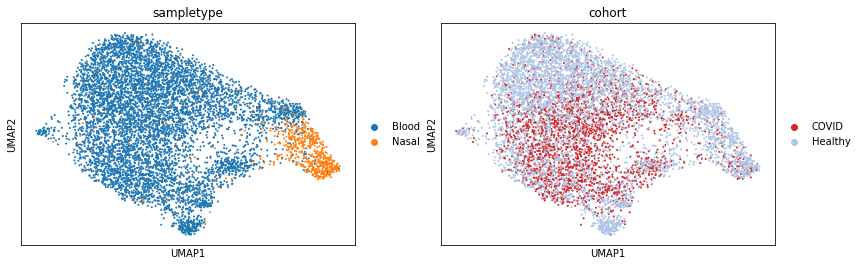

In [126]:
sc.pl.umap(rna_x, color=['sampletype', 'cohort'])

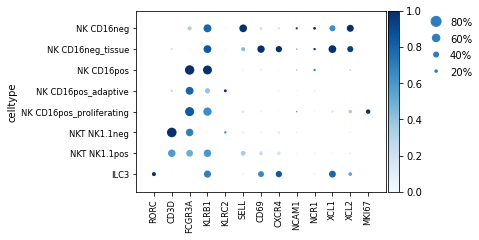

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[4.55, 0, 0.2, 0.5, 0.25])

In [81]:
sc.pl.dotplot(rna_x, ['RORC', 'CD3D', 'FCGR3A', 'KLRB1', 'KLRC2', 'SELL', 'CD69', 'CXCR4', 'NCAM1', 'NCR1', 'XCL1', 'XCL2', 'MKI67'], groupby = 'celltype', standard_scale = 'var', color_map = 'Blues')

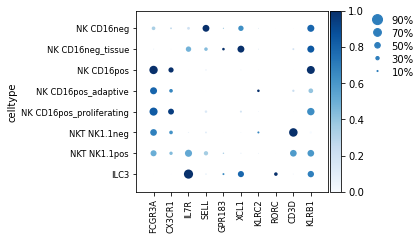

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[3.5, 0, 0.2, 0.5, 0.25])

In [89]:
sc.pl.dotplot(rna_x, ['FCGR3A', 'CX3CR1', 'IL7R', 'SELL', 'GPR183',  'XCL1', 'KLRC2', 'RORC', 'CD3D', 'KLRB1'], groupby = 'celltype', standard_scale = 'var', color_map = 'Blues')

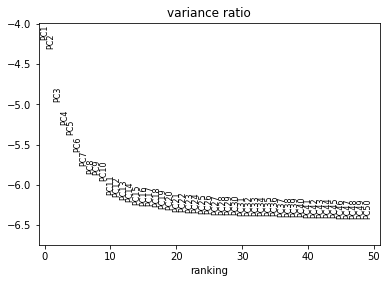

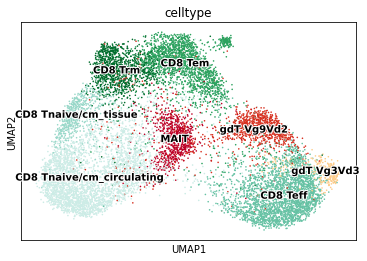

In [127]:
# subset
rna_ = adata[adata.obs['main_celltype'].isin(['CD8T/gdT/MAIT'])]
rna_x = rna_.raw.to_adata()
rna_x.raw = rna_x
sc.pp.highly_variable_genes(rna_x, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
import re
for i in rna_x.var.index:
    if re.search('^TR[AB][VDJ]', i):
        rna_x.var.at[i, 'highly_variable'] = False
import re
for i in rna_x.var.index:
    if re.search('^TRAV1-2$', i):
        rna_x.var.at[i, 'highly_variable'] = False
# subset to highly variable
rna_x = rna_x[:, rna_x.var['highly_variable']]
# regress and scale for PCA
sc.pp.regress_out(rna_x, ['n_counts', 'percent_mito'])
sc.pp.scale(rna_x, max_value = 10)
# Principal component analysis
sc.tl.pca(rna_x, svd_solver = 'arpack')
sc.pl.pca_variance_ratio(rna_x, log = True, n_pcs = 50)
# # run BBKNN
sc.external.pp.bbknn(rna_x, batch_key = 'patient')
# UMAP
sc.tl.umap(rna_x, n_components = 2, min_dist = 0.3)
sc.pl.umap(rna_x, color=['celltype'], legend_loc = 'on data', legend_fontoutline = 2)

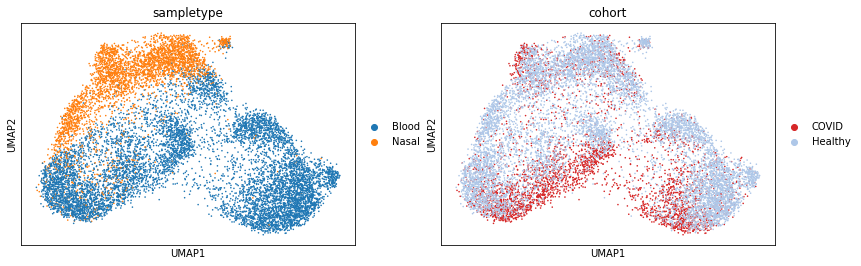

In [128]:
sc.pl.umap(rna_x, color=['sampletype', 'cohort'])

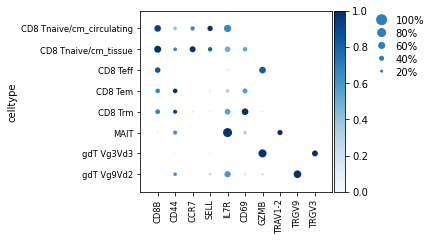

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[3.5, 0, 0.2, 0.5, 0.25])

In [49]:
sc.pl.dotplot(rna_x, ['CD8B', 'CD44', 'CCR7', 'SELL', 'IL7R', 'CD69', 'GZMB', 'TRAV1-2', 'TRGV9', 'TRGV3'], groupby = 'celltype', color_map = 'Blues', standard_scale = 'var')

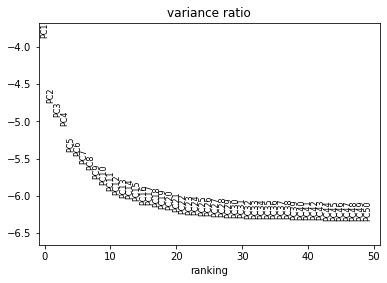

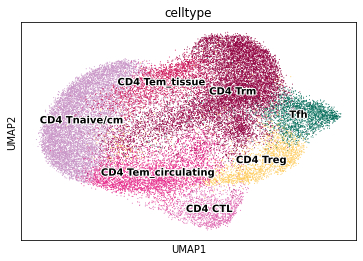

In [129]:
# subset
rna_ = adata[adata.obs['main_celltype'].isin(['CD4T'])]
rna_x = rna_.raw.to_adata()
rna_x.raw = rna_x
sc.pp.highly_variable_genes(rna_x, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
import re
for i in rna_x.var.index:
    if re.search('^TR[AB][VDJ]', i):
        rna_x.var.at[i, 'highly_variable'] = False
# subset to highly variable
rna_x = rna_x[:, rna_x.var['highly_variable']]
# regress and scale for PCA
sc.pp.regress_out(rna_x, ['n_counts', 'percent_mito'])
sc.pp.scale(rna_x, max_value = 10)
# Principal component analysis
sc.tl.pca(rna_x, svd_solver = 'arpack')
sc.pl.pca_variance_ratio(rna_x, log = True, n_pcs = 50)
# # run BBKNN
sc.external.pp.bbknn(rna_x, batch_key = 'patient')
# UMAP
sc.tl.umap(rna_x, n_components = 2, min_dist = 0.3)
sc.pl.umap(rna_x, color=['celltype'], legend_loc = 'on data', legend_fontoutline = 2)

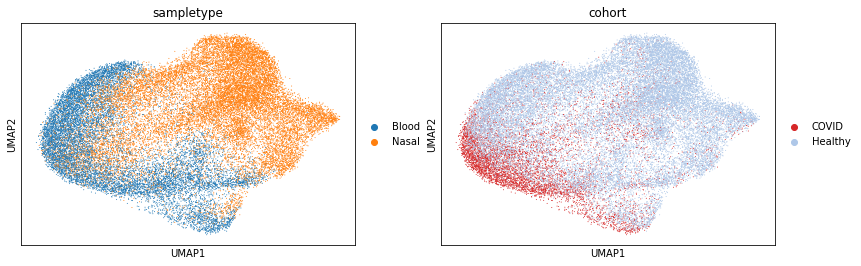

In [130]:
sc.pl.umap(rna_x, color=['sampletype', 'cohort'])

... storing 'celltype' as categorical


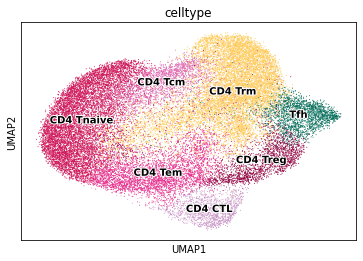

In [91]:
new_dict = {'CD4 Trm':'CD4 Trm',
'CD4 CTL':'CD4 CTL',
'CD4 Tem_tissue':'CD4 Tcm',
'CD4 Treg':'CD4 Treg',
'CD4 Tnaive/cm':'CD4 Tnaive',
'CD4 Tem_circulating':'CD4 Tem',
'Tfh':'Tfh'}
rna_x.obs['celltype'] = [new_dict[l] for l in rna_x.obs['celltype']]
sc.pl.umap(rna_x, color=['celltype'], legend_loc = 'on data', legend_fontoutline = 2)

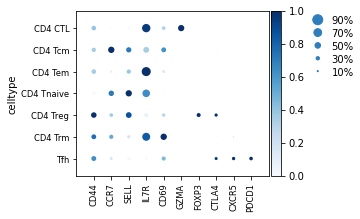

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[3.5, 0, 0.2, 0.5, 0.25])

In [92]:
sc.pl.dotplot(rna_x, ['CD44', 'CCR7', 'SELL', 'IL7R', 'CD69', 'GZMA', 'FOXP3', 'CTLA4', 'CXCR5', 'PDCD1'], groupby = 'celltype', color_map = 'Blues', standard_scale = 'var')

In [93]:
Kumar_Trm_signature = {
    'CD69+Trm':['CA10','ITGAE1','ITGAE','IL2','IL10','CXCR6','CXCL13','KCNK5','RGS1','CRTAM','DUSP6','PDCD1','IL23R'],
    'CD69-Tem':['STK38','TTC16','SELL','KLF3','KLF2','D4S234E','SBK1','FAM65B','TTYH2','NPDC1','KRT72','S1PR1','SOX13','KRT73','TSPAN18','PTGDS','RAP1GAP2','CX3CR1']}
Mackay_Trm_signature={
    'Trm':['INSIG1', 'DDX3X', 'DHCR24', 'PPP1R16B', 'KLF6', 'BTG2', 'CXCR6', 'FOSB', 'JUN', 'HSPA5', 'NEDD4', 'PLK3', 'STARD4', 'TNFAIP3', 'B4GALNT4', 'IRF4', 'CISH', 'MAPKAPK3', 'SIK1', 'PYGL', 'CTNNA1', 'ODC1', 'PER1', 'DUSP1', 'ATF3', 'LDLRAD4', 'JUNB', 'NFKBID', 'FOSL2', 'RGS2', 'NR4A2', 'DGAT1', 'ARRDC3', 'FRMD4B', 'NR4A1', 'GPR171', 'SMIM3', 'EYA2', 'GPR55', 'AL662899.4', 'CSRNP1', 'TRAF4', 'ZFP36', 'GLRX', 'DUSP5', 'LITAF', 'GADD45B', 'IFNG', 'OSGIN1', 'ABI3', 'EGR1', 'HILPDA', 'SKIL', 'RNF149', 'HMGCS1', 'P4HB', 'PNRC1', 'GPR34', 'PPP1R15A', 'ITGAE', 'P2RY10', 'EHD1', 'DUSP6', 'XCL2', 'SPSB1', 'ISG20', 'INPP4B', 'NEURL3', 'HPGDS', 'RHOB', 'VDAC1', 'LAD1', 'FOS', 'CDH1', 'CD69', 'QPCT', 'HSPD1'],
    'Tcm/Tem':['HBA2', 'C19orf38', 'SNX10', 'HAAO', 'POGK', 'SBK1', 'KLF2', 'BCL9L', 'THAP7', 'ASRGL1', 'ELMO1', 'HEXB', 'RACGAP1', 'CXCR4', 'CDC25B', 'LFNG', 'S1PR5', 'ARHGAP26', 'MPND', 'KCNAB2', 'ATP1B3', 'S1PR4', 'TMEM71', 'KBTBD11', 'EMB', 'MS4A4A', 'GRAMD4', 'EHD3', 'KCNN4', 'TCF7', 'MS4A4A', 'PAQR7', 'FAM89B', 'LYST', 'GLIPR2', 'EML3', 'S1PR1', 'PIK3R5', 'SETX', 'TXNDC5', 'NCLN', 'STK38', 'ITGA4', 'CCL5', 'CD84', 'KLF3', 'ABTB2', 'TBXA2R', 'LYRM2', 'OBP2B', 'ACP5', 'PODNL1', 'LEF1', 'SH2D1A', 'PHF11', 'TSR3', 'GMFG', 'EOMES', 'GNPDA2', 'PDE2A', 'SIDT1', 'GAB3', 'TXK', 'AVEN', 'ICAM2', 'KLHL6', 'SAMHD1', 'SMPDL3B', 'TTC7B', 'C5orf30', 'ATP10D', 'ST3GAL1', 'VOPP1', 'PCED1B', 'DOCK2', 'ITGB1', 'FAM117A', 'IL10RA', 'LPIN1', 'RBM43', 'ARHGEF18', 'RASA3', 'ABHD8', 'FAM49A', 'RASGRP2', 'B3GAT3', 'PRKCQ', 'XRN2']}

In [94]:
for gs in Kumar_Trm_signature:
    sc.tl.score_genes(rna_x, Kumar_Trm_signature[gs], score_name = str(gs)+'_score', use_raw=True)
for gs in Mackay_Trm_signature:
    sc.tl.score_genes(rna_x, Mackay_Trm_signature[gs], score_name = str(gs)+'_score', use_raw=True)

In [97]:
# try gene set test with some other gene sets
modules = pd.read_csv('/home/jovyan/NC_study/scanpy/datasets/GSE26928_tcell_genesets.txt', sep = '\t')
for gs in modules.columns:
    sc.tl.score_genes(rna_x, modules[gs], score_name = str(gs)+'_score', use_raw=True)
# try gene set test with some other gene sets
modules2 = pd.read_csv('/home/jovyan/Prostate_analysis/scanpy/dataset/Szabo et al T cell gene module.txt', sep = '\t')
for gs in modules2.columns:
    sc.tl.score_genes(rna_x, modules2[gs], score_name = str(gs)+'_score', use_raw=True)

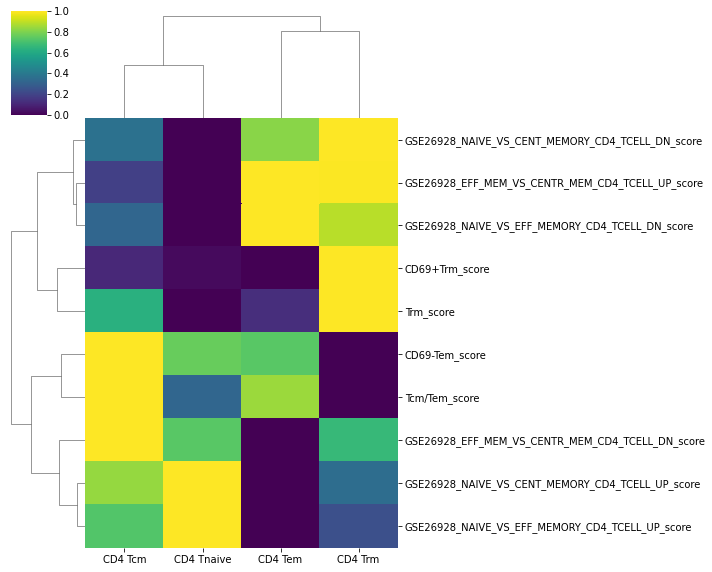

In [106]:
# calculate average enrichment score
test = rna_x[~(rna_x.obs['celltype'].isin(['Tfh', 'CD4 Treg', 'CD4 CTL']))]
list1 = list(set(test.obs['celltype']))
subset = test.obs[['celltype'] + [str(gs)+'_score' for gs in modules.columns] + [str(gs)+'_score' for gs in Kumar_Trm_signature]+[str(gs)+'_score' for gs in Mackay_Trm_signature]]
output = pd.DataFrame()
for x in list1:
    subsetX = subset[subset['celltype'] == x]
    outdict = {}
    for k in [str(gs)+'_score' for gs in modules.columns] + [str(gs)+'_score' for gs in Kumar_Trm_signature]+[str(gs)+'_score' for gs in Mackay_Trm_signature]:
        out = {k:np.mean(subsetX[k])}
        outdict.update(out)
    output = output.append(outdict, ignore_index=True)
output.index = list1
g = sns.clustermap(output.transpose(), standard_scale = 0, cmap="viridis", figsize=(10, 8))

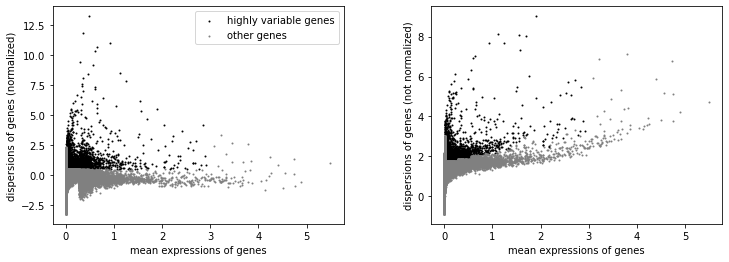

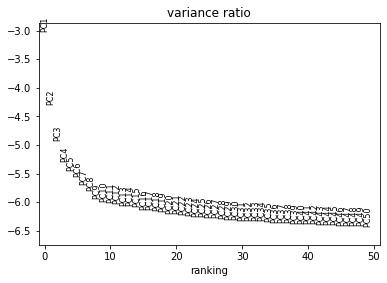

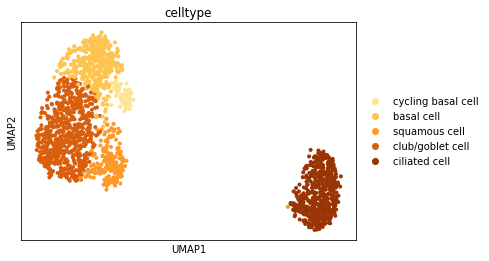

In [17]:
# subset
rna_ = adata[adata.obs['main_celltype'].isin(['epithelial'])]
rna_x = rna_.raw.to_adata()
rna_x.raw = rna_x
sc.pp.highly_variable_genes(rna_x, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
sc.pl.highly_variable_genes(rna_x)
# subset to highly variable
rna_x = rna_x[:, rna_x.var['highly_variable']]
# regress and scale for PCA
sc.pp.regress_out(rna_x, ['n_counts', 'percent_mito'])
sc.pp.scale(rna_x, max_value = 10)
# Principal component analysis
sc.tl.pca(rna_x, svd_solver = 'arpack')
sc.pl.pca_variance_ratio(rna_x, log = True, n_pcs = 50)
# # run BBKNN
sc.external.pp.bbknn(rna_x, batch_key = 'patient')
# UMAP
sc.tl.umap(rna_x, n_components = 2, min_dist = 0.3)
sc.pl.umap(rna_x, color=['celltype'])

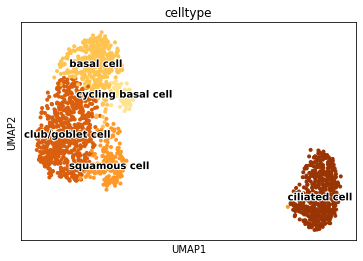

In [22]:
sc.pl.umap(rna_x, color=['celltype'], legend_fontoutline = 2, legend_loc = 'on data')

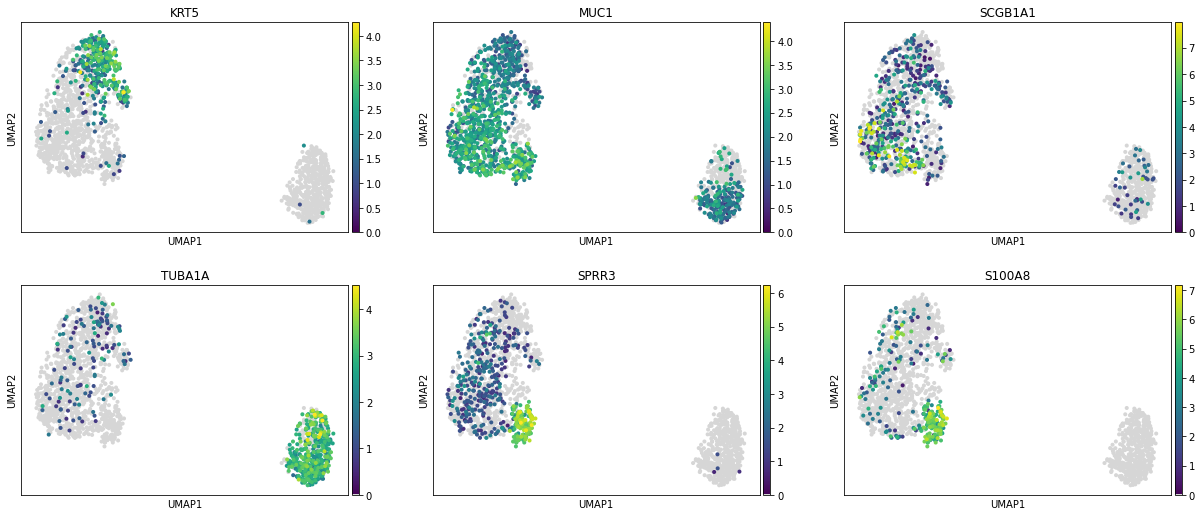

In [23]:
sc.pl.umap(rna_x, color = ['KRT5', 'MUC1', 'SCGB1A1', 'TUBA1A','SPRR3', 'S100A8'], color_map =newcmp, ncols = 3)

### get breakdown of labels

In [3]:
blood = adata[adata.obs['sampletype'] == 'Blood']
nasal = adata[adata.obs['sampletype'] == 'Nasal']

In [4]:
pd.crosstab(blood.obs['celltype'], blood.obs['cohort'])

cohort                       COVID  Healthy
celltype                                   
CD8 Tnaive/cm_circulating     1117     1780
CD8 Tnaive/cm_tissue             4       19
CD8 Teff                       871     1812
CD8 Tem                         86      510
CD8 Trm                          4       34
CD4 Tnaive/cm                 2255     4598
CD4 CTL                        436      609
CD4 Tem_circulating           1369     2144
CD4 Tem_tissue                  21       75
CD4 Trm                         31      121
CD4 Treg                       144      571
Tfh                              4       11
MAIT                           321      432
gdT Vg3Vd3                      49      303
gdT Vg9Vd2                     252      768
NK CD16neg                     104      373
NK CD16neg_tissue                2       17
NK CD16pos                    1165     2510
NK CD16pos_adaptive            862      610
NK CD16pos_proliferating        17       62
NKT NK1.1neg                   195      391
NKT NK1.1pos                   155      155
ILC3                             4       16
B naive                        248      976
B non-switched memory          138      399
B switched memory              458      569
B switched memory_tissue        16        8
B activated                      2       10
B GC_int                         0        1
B plasma_IgA                    17       28
B plasma_IgG                    14       10
pDC                             15      134
cDC1                            18       13
cDC2                           178      263
classical monocyte            2175     3400
non-classical monocyte         282      959
monocyte-derived macrophage     19        3
tissue resident macrophage       2        3
erythrocyte                    770      672
megakaryocyte                   89      246
basal cell                       1        0
squamous cell                    1        0
club/goblet cell                 0        1

In [5]:
pd.crosstab(nasal.obs['celltype'], nasal.obs['cohort'])

cohort                       COVID  Healthy
celltype                                   
CD8 Tnaive/cm_circulating      230      158
CD8 Tnaive/cm_tissue            53      540
CD8 Teff                         6        2
CD8 Tem                        262     1098
CD8 Trm                        288      771
CD4 Tnaive/cm                  917      946
CD4 CTL                        118      263
CD4 Tem_circulating            335      402
CD4 Tem_tissue                  60     2011
CD4 Trm                       1110     9228
CD4 Treg                       139     1359
Tfh                            103     2043
MAIT                            11        9
gdT Vg3Vd3                       1        1
gdT Vg9Vd2                      16       31
NK CD16neg                      15       52
NK CD16neg_tissue               27      205
NK CD16pos                      14        7
NK CD16pos_adaptive             10        1
NK CD16pos_proliferating         2        0
NKT NK1.1neg                     6        2
NKT NK1.1pos                     8        5
ILC3                            75      179
B naive                        453     1203
B non-switched memory          559     3821
B switched memory             1469     3183
B switched memory_tissue        54      905
B activated                    660      223
B GC_LZ                          4      114
B GC_int                        23      272
B GC_DZ                         29      153
B plasma_IgA                   114      840
B plasma_IgG                   220      851
pDC                             26      212
cDC1                             7       11
cDC2                             8        8
classical monocyte               3       16
non-classical monocyte           5        5
monocyte-derived macrophage     42        3
tissue resident macrophage      21       70
erythrocyte                     12       29
cycling basal cell              63        3
basal cell                     364       20
squamous cell                  163       44
club/goblet cell               629       37
ciliated cell                  286      219

### subset MNPs and B cells to their own objects

In [156]:
mnp = adata[(adata.obs['celltype'].isin(['cDC1', 'cDC2', 'classical monocyte', 'non-classical monocyte', 'monocyte-derived macrophage', 'tissue resident macrophage'])) & (adata.obs['sampletype'] == 'Nasal')]
mnp = mnp.raw.to_adata()
mnp.raw = mnp
mnp

AnnData object with n_obs × n_vars = 199 × 22498
    obs: 'sampleid', 'patient', 'sampletype', 'age_group', 'gender', 'cohort', 'batch', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'bh_pval', 'is_doublet', 'filter_rna', 'leiden', 'main_celltype', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'cohort_colors', 'gender_colors', 'hvg', 'leiden', 'leiden_colors', 'main_celltype_colors', 'neighbors', 'patient_colors', 'pca', 'sampleid_colors', 'sampletype_colors', 'temp_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

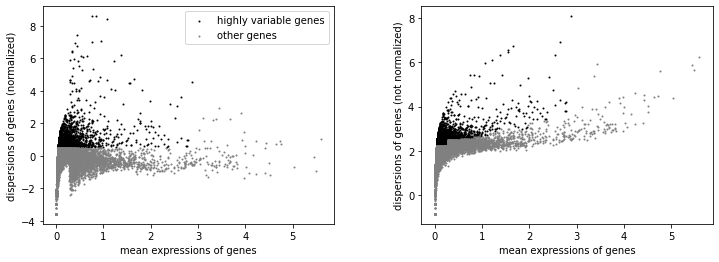

In [157]:
sc.pp.highly_variable_genes(mnp, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
sc.pl.highly_variable_genes(mnp)

In [158]:
# subset to highly variable
mnp = mnp[:, mnp.var['highly_variable']]
# regress and scale for PCA
sc.pp.regress_out(mnp, ['n_counts', 'percent_mito'])
sc.pp.scale(mnp, max_value = 10)

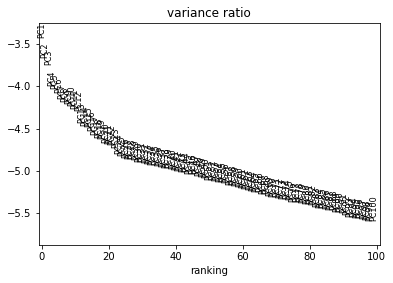

In [168]:
# Principal component analysis
sc.tl.pca(mnp, svd_solver = 'arpack', n_comps =100)
sc.pl.pca_variance_ratio(mnp, log = True, n_pcs = 100)

In [160]:
mnp.uns['celltype_colors']

array(['#5c5c5c', '#c7c7c7', '#4e79a7', '#a0cbe8', '#ff9d9a', '#d62728'],
      dtype=object)

In [161]:
# new_dict = {'cDC1':'cDC1',
# 'cDC2':'cDC2',
# 'classical monocyte':'classical monocyte',
# 'non-classical monocyte':'non-classical monocyte',
# 'monocyte-derived macrophage':'tissue resident macrophage',
# 'tissue resident macrophage':'tissue resident macrophage'}
# mnp.obs['celltype'] = [new_dict[l] for l in mnp.obs['celltype']]
# sc.pl.umap(mnp, color=['celltype'], legend_loc = 'on data', legend_fontoutline = 2, palette = ['#5c5c5c', '#c7c7c7', '#4e79a7', '#a0cbe8', '#d62728'])

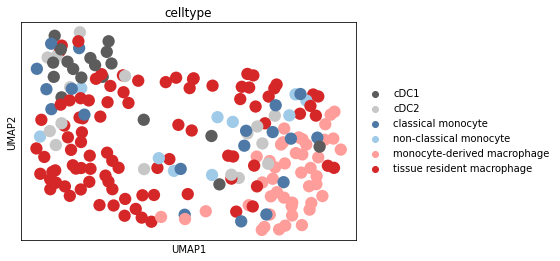

In [170]:
# # run BBKNN
sc.external.pp.bbknn(mnp, batch_key = 'patient', n_pcs=10)
# UMAP
sc.tl.umap(mnp, n_components = 2, min_dist = 0.3)
sc.pl.umap(mnp, color=['celltype'])

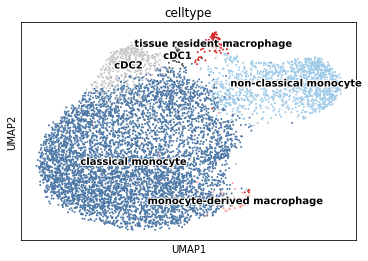

In [149]:
sc.pl.umap(mnp, color=['celltype'], legend_fontoutline = 2, legend_loc = 'on data')

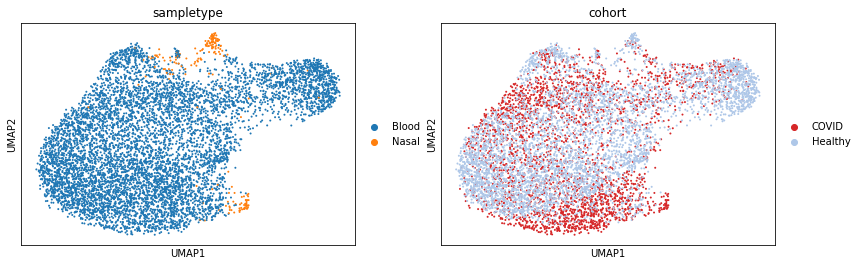

In [150]:
sc.pl.umap(mnp, color=['sampletype', 'cohort'])

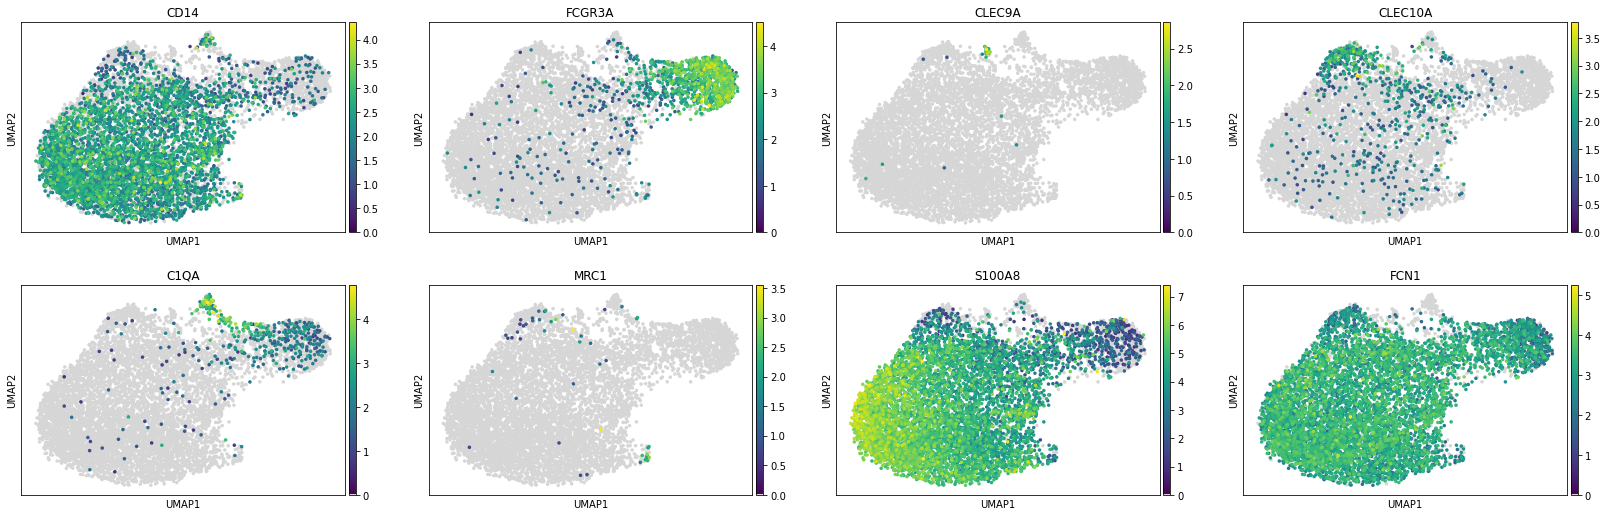

In [151]:
sc.pl.umap(mnp, color = ['CD14', 'FCGR3A', 'CLEC9A', 'CLEC10A', 'C1QA', 'MRC1', 'S100A8', 'FCN1'], color_map =newcmp, size = 50)

In [152]:
macrophage_signature = {'YS':['MMP9', 'CADM1', 'IRAK1', 'SH3YL1', 'DNAJB6', 'EPCAM', 'ECD', 'PFKP', 'FABP4', 'MS4A7', 'DCAKD', 'GPS1', 'TRNAU1AP', 'AGPAT3', 'DNAJB6', 'GPS1', 'SAE1', 'FOSB', 'HOXC4', 'FOLR2', 'GPS1', 'BAZ1B', 'OST4', 'PTPRA', 'PLOD1', 'PHF5A', 'NMD3', 'PLAU', 'CDK2', 'MAPK9', 'GDPD1', 'FBXO30', 'TRNAU1AP', 'MRC1', 'FAM98B', 'CCDC18', 'ANLN', 'CTBP2', 'ACSM3', 'S1PR1', 'PXDN', 'MAN1A1', 'COX6A1', 'SLC43A3', 'CCDC47', 'TNS3', 'PLEKHG5', 'NDUFS4', 'UBE2Z', 'B3GALNT1', 'TBC1D19', 'MRTO4', 'TRAIP', 'CEP55', 'UTP20', 'STMN1', 'STAB1', 'SMARCAD1', 'CTSB', 'MAN2B2', 'PTN', 'SLC30A7', 'LHFPL2', 'RALGDS', 'ABCB8', 'NDRG3', 'PEG3', 'NUF2', 'SENP5', 'SLC35D1', 'RILPL1', 'NDUFV1', 'AHSA1'],
'HSC':[' TTLL3', 'GDA', 'GPR35', 'IFITM2', 'XDH', 'CD74', 'MBP', 'S100A8', 'F12', 'PID1', 'CCR2', 'LILRA4', 'PNRC1', 'ARHGEF37', 'UBP1', 'TREML4', 'POLR1E', 'CYTIP', 'TEAD1', 'GZF1', 'PLAC8', 'RASGRP4', 'KLF13', 'PLBD1', 'MPG', 'DENND1C', 'SMPDL3A', 'DGKG', 'AL121845.2', 'PTHLH', 'AHNAK', 'KYNU', 'RAC2', 'AC069257.4', 'SELL']}

In [153]:
def geneset_score(self, genesets, groupby, figsize=(3, 4), cmap = 'Blues'):
    import seaborn as sns
    for s in genesets:
        sc.tl.score_genes(self, genesets[s], use_raw = True, score_name= str(s)+'_score')
    # calculate average enrichment score
    list1 = list(set(self.obs[groupby]))
    subset = self.obs[[groupby] + [str(s)+'_score' for s in genesets]]
    output = pd.DataFrame()
    for x in list1:
        subsetX = subset[subset[groupby] == x]
        outdict = {}
        for k in [str(s)+'_score' for s in genesets]:
            out = {k:np.mean(subsetX[k])}
            outdict.update(out)
        output = output.append(outdict, ignore_index=True)
    output.index = list1
    output = output[[str(s)+'_score' for s in genesets]]
    g = sns.clustermap(output.transpose(), standard_scale = 0, cmap=cmap, figsize=figsize, col_cluster = True, row_cluster = True)
    print(g)

Trying to set attribute `.obs` of view, copying.


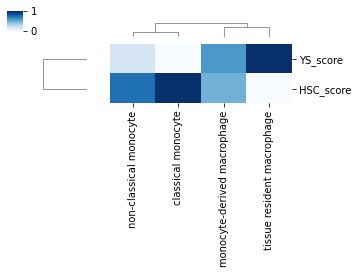

In [155]:
geneset_score(mnp[~(mnp.obs['celltype'].isin(['cDC1','cDC2']))], macrophage_signature, 'celltype', (4.5,1.5))

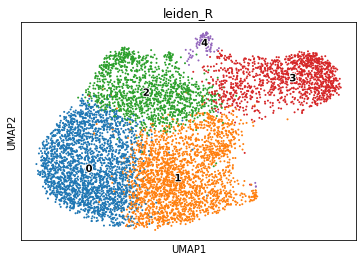

In [11]:
# find clusters
sc.tl.leiden(mnp, resolution = 0.5, key_added = 'leiden_R')
sc.pl.umap(mnp, color=['leiden_R'], legend_loc ='on data', legend_fontoutline=2)

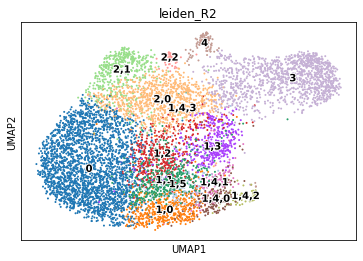

In [17]:
# find clusters
sc.tl.leiden(mnp, key_added = 'leiden_R2', restrict_to = ('leiden_R', ['1']), resolution = 1)
sc.tl.leiden(mnp, key_added = 'leiden_R2', restrict_to = ('leiden_R2', ['2']), resolution = 0.5)
sc.tl.leiden(mnp, key_added = 'leiden_R2', restrict_to = ('leiden_R2', ['1,4']), resolution = 0.5)
sc.pl.umap(mnp, color=['leiden_R2'], legend_loc ='on data', legend_fontoutline=2)

In [18]:
mnp2 = mnp.raw.to_adata()
mnp2.raw = mnp2
mnp2

AnnData object with n_obs × n_vars = 7514 × 22498
    obs: 'sampleid', 'patient', 'sampletype', 'age_group', 'gender', 'cohort', 'batch', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'bh_pval', 'is_doublet', 'filter_rna', 'leiden', 'main_celltype', 'celltype', 'leiden_R', 'leiden_R2'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'cohort_colors', 'gender_colors', 'hvg', 'leiden', 'leiden_colors', 'main_celltype_colors', 'neighbors', 'patient_colors', 'pca', 'sampleid_colors', 'sampletype_colors', 'temp_label_colors', 'umap', 'leiden_R_colors', 'leiden_R2_colors'
    obsm: 'X_pca', 'X_umap'

In [19]:
mnp2.write('out/adata_mnp_v2.h5ad', compression = 'gzip')

### B cells

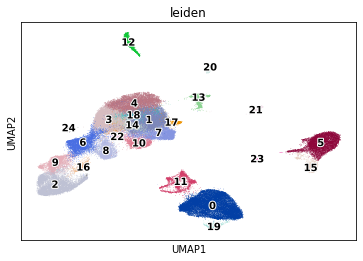

In [3]:
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data', legend_fontoutline = 2)

In [3]:
b = adata[adata.obs['main_celltype'] == 'B']
b = b.raw.to_adata()
b.raw = b
b

AnnData object with n_obs × n_vars = 18044 × 22498
    obs: 'sampleid', 'patient', 'sampletype', 'age_group', 'gender', 'cohort', 'batch', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'bh_pval', 'is_doublet', 'filter_rna', 'leiden', 'main_celltype', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'cohort_colors', 'gender_colors', 'hvg', 'leiden', 'leiden_colors', 'main_celltype_colors', 'neighbors', 'patient_colors', 'pca', 'sampleid_colors', 'sampletype_colors', 'temp_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

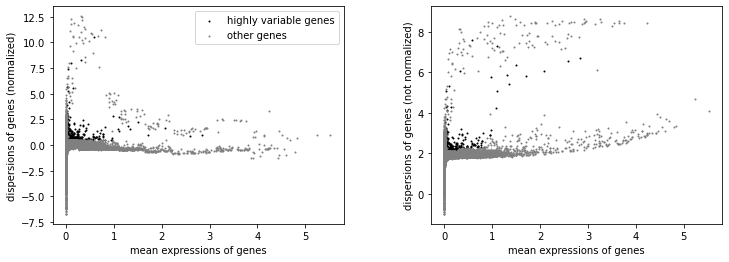

In [4]:
sc.pp.highly_variable_genes(b, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
import re
for i in b.var.index:
    if re.search('^IG[HKL][VDJ]', i):
        b.var.at[i, 'highly_variable'] = False
sc.pl.highly_variable_genes(b)

In [5]:
# subset to highly variable
b = b[:, b.var['highly_variable']]
# regress and scale for PCA
sc.pp.regress_out(b, ['n_counts', 'percent_mito'])
sc.pp.scale(b, max_value = 10)

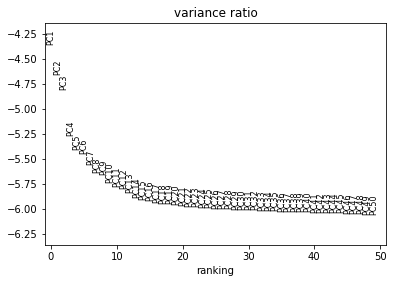

In [6]:
# Principal component analysis
sc.tl.pca(b, svd_solver = 'arpack')
sc.pl.pca_variance_ratio(b, log = True, n_pcs = 50)

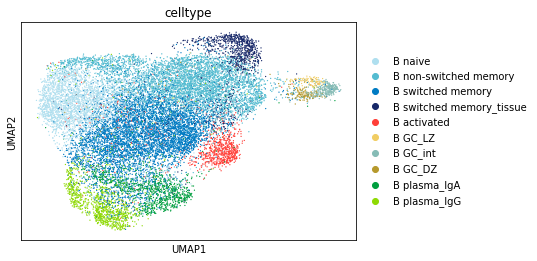

In [7]:
# # run BBKNN
sc.external.pp.bbknn(b, batch_key = 'patient')
# UMAP
sc.tl.umap(b, n_components = 2, min_dist = 0.3)
sc.pl.umap(b, color=['celltype'])

In [17]:
b.write('out/adata_bcell_v2.h5ad', compression = 'gzip')

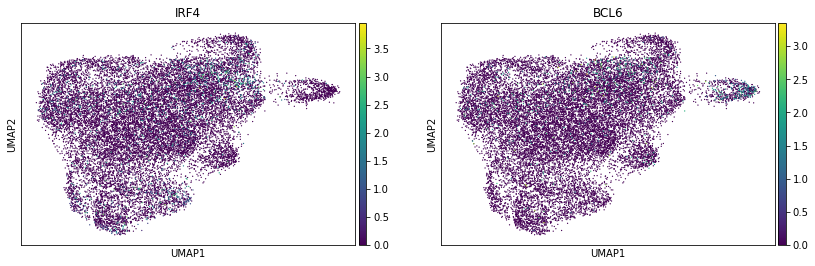

In [8]:
sc.pl.umap(b, color=['IRF4', 'BCL6'])

In [16]:
sc.tl.rank_genes_groups(b, groupby = 'celltype', groups = ['B activated'])
sc.tl.filter_rank_genes_groups(b, min_fold_change=1)

categories: B naive, B non-switched memory, B switched memory, etc.
var_group_labels: B activated


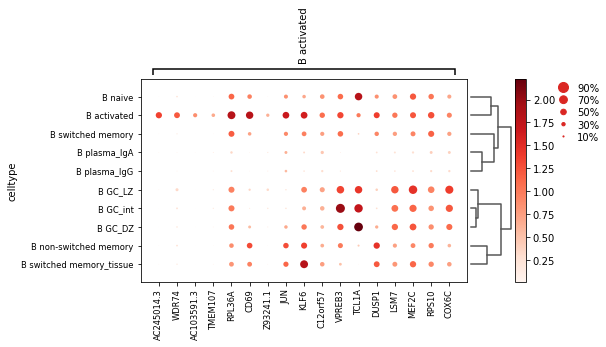

In [18]:
sc.pl.rank_genes_groups_dotplot(b, key = 'rank_genes_groups_filtered', n_genes=25)

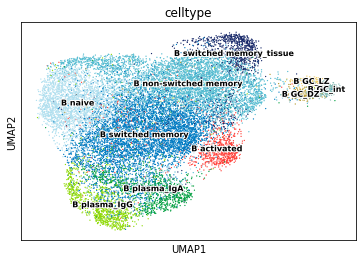

In [13]:
# sc.set_figure_params(dpi= 300, figsize=(6,4))
sc.pl.umap(b, color=['celltype'], legend_loc = 'on data', legend_fontoutline = 2, legend_fontsize=8)

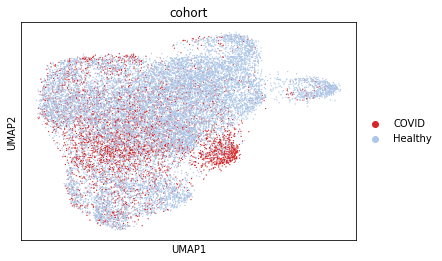

In [14]:
sc.pl.umap(b, color = 'cohort')

In [15]:
df1 = pd.read_csv('datasets/GSE22886_BcellGenesets.txt', sep = '\t', index_col = None, header = 0, na_filter=None)
df2 = pd.read_csv('datasets/GSE38697_GSE12845_BcellGenesets.txt', sep = '\t', index_col = None, header = 0, na_filter=None)
df3 = pd.read_csv('datasets/Bcell_genesets.txt', sep='\t', header=0, index_col = None, na_filter=False)
df4 = pd.read_csv('datasets/Monaco B cells.txt', sep='\t', header=0, index_col = None, na_filter=False)

In [18]:
def geneset_score(self, genesets, groupby, figsize=(3, 4), cmap = 'viridis', col_cluster = True, row_cluster = True):
    import seaborn as sns
    for s in genesets:
        sc.tl.score_genes(self, [y for y in genesets[s] if y != ''], use_raw = True, score_name= str(s)+'_score')
    # calculate average enrichment score
    list1 = list(set(self.obs[groupby]))
    subset = self.obs[[groupby] + [str(s)+'_score' for s in genesets]]
    output = pd.DataFrame()
    for x in list1:
        subsetX = subset[subset[groupby] == x]
        outdict = {}
        for k in [str(s)+'_score' for s in genesets]:
            out = {k:np.mean(subsetX[k])}
            outdict.update(out)
        output = output.append(outdict, ignore_index=True)
    output.index = list1
    output = output[[str(s)+'_score' for s in genesets]]
    g = sns.clustermap(output.transpose(), standard_scale = 0, cmap=cmap, figsize=figsize, col_cluster = col_cluster, row_cluster = row_cluster)
    sc.pl.umap(self, color = [str(s)+'_score' for s in genesets], size = 80, ncols = 2)
    print(g)

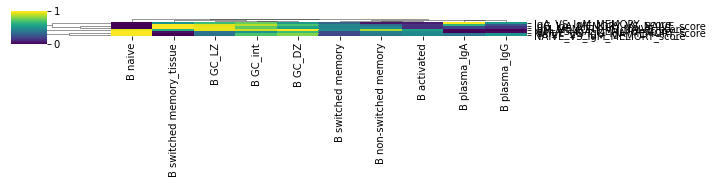

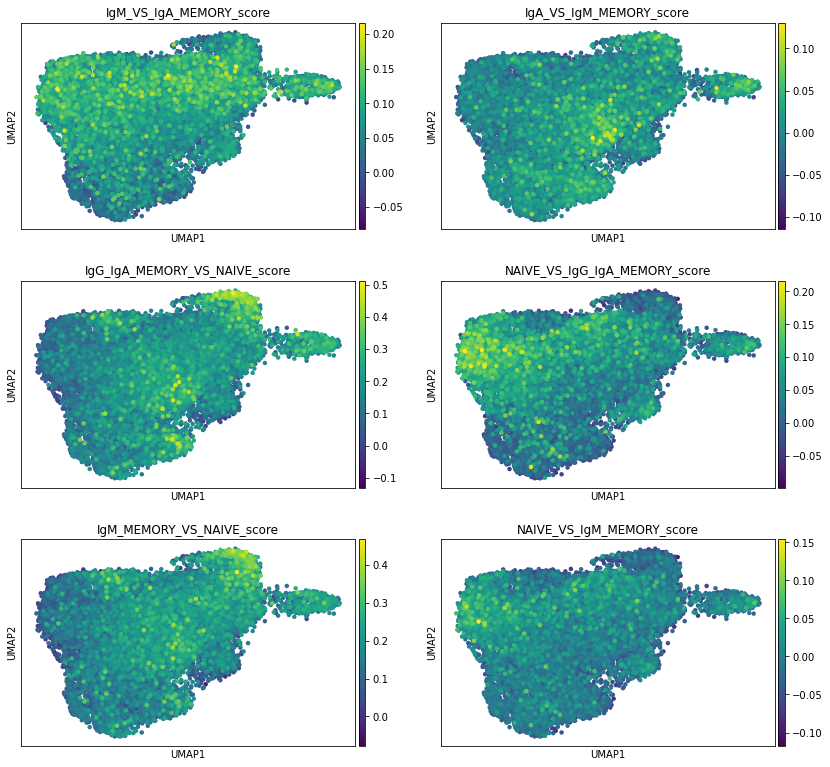

In [19]:
geneset_score(b, df1, 'celltype', (10,2.5))

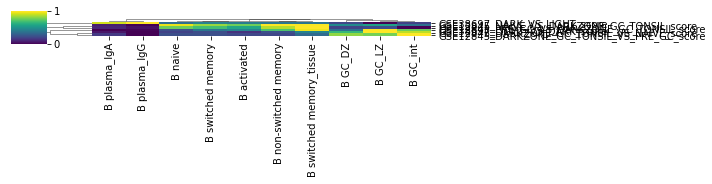

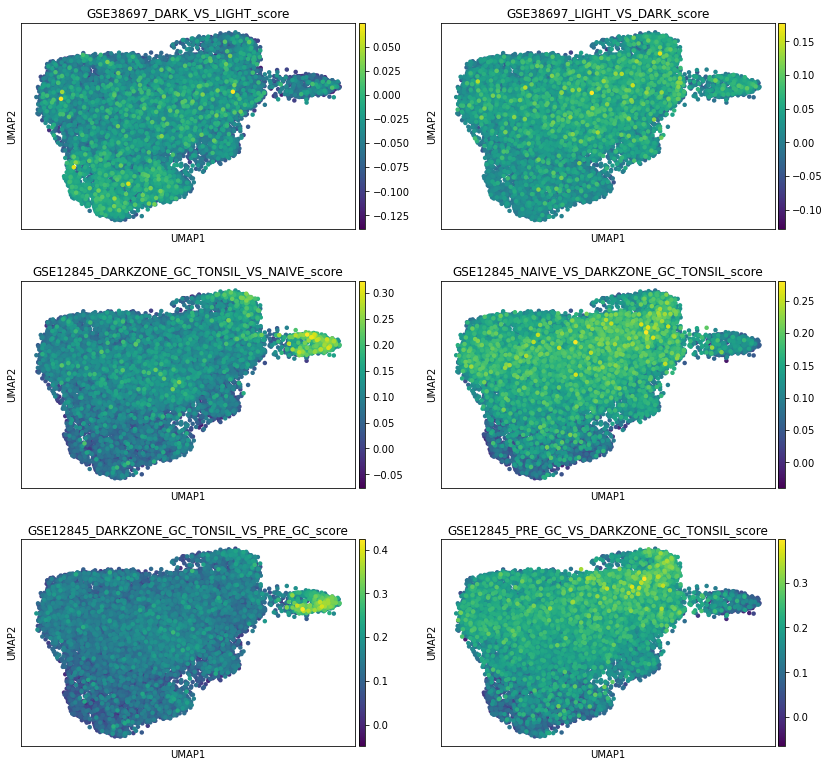

In [20]:
geneset_score(b, df2, 'celltype', (10,2.5))

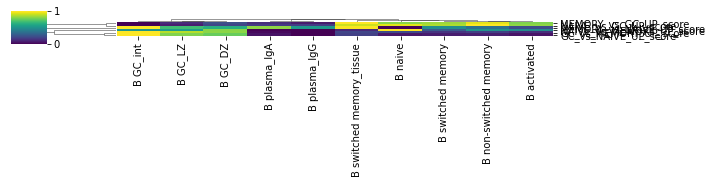

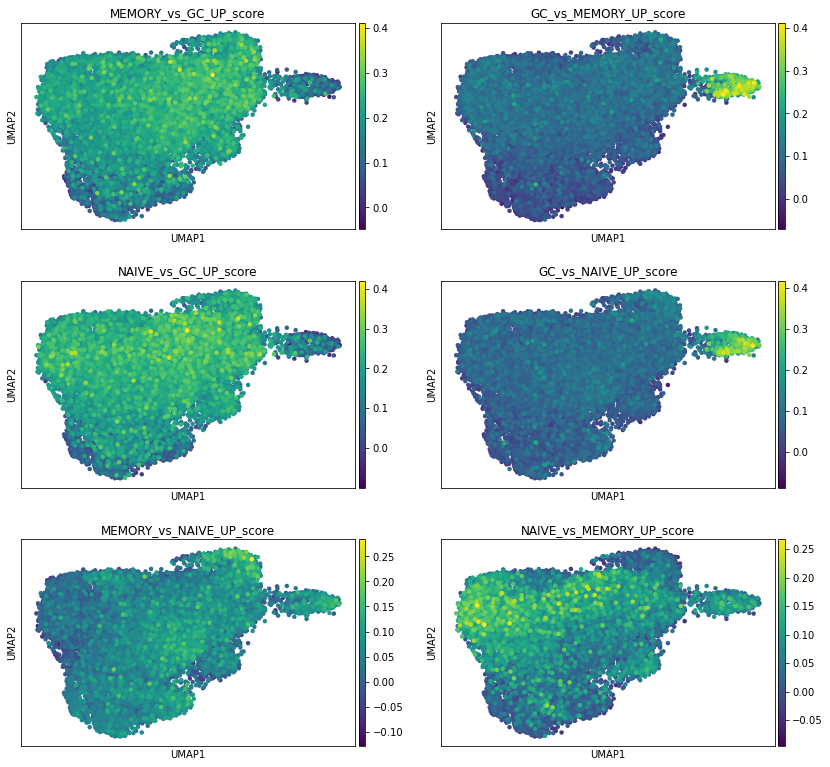

In [21]:
geneset_score(b, df3, 'celltype', (10,2.5))

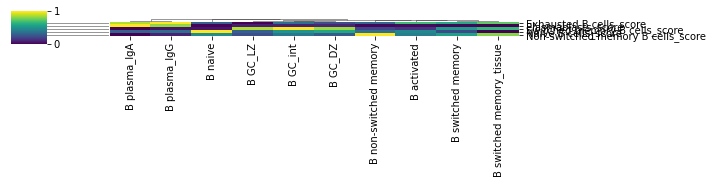

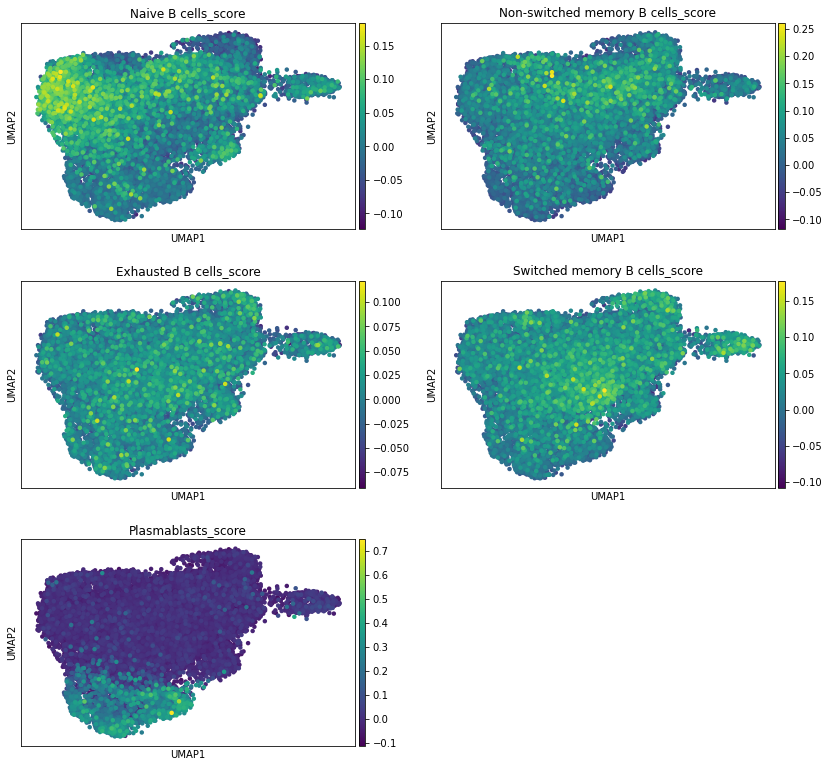

In [22]:
geneset_score(b, df4, 'celltype', (10,2.5))

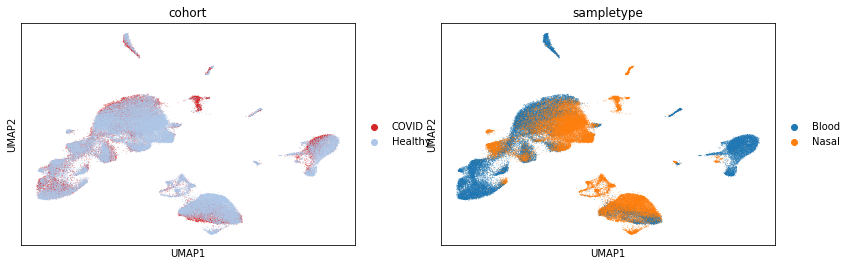

In [24]:
sc.pl.umap(adata, color =['cohort', 'sampletype'])

In [25]:
b

AnnData object with n_obs × n_vars = 18044 × 771
    obs: 'sampleid', 'patient', 'sampletype', 'age_group', 'gender', 'cohort', 'batch', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'bh_pval', 'is_doublet', 'filter_rna', 'leiden', 'main_celltype', 'celltype', 'IgM_VS_IgA_MEMORY_score', 'IgA_VS_IgM_MEMORY_score', 'IgG_IgA_MEMORY_VS_NAIVE_score', 'NAIVE_VS_IgG_IgA_MEMORY_score', 'IgM_MEMORY_VS_NAIVE_score', 'NAIVE_VS_IgM_MEMORY_score', 'GSE38697_DARK_VS_LIGHT_score', 'GSE38697_LIGHT_VS_DARK_score', 'GSE12845_DARKZONE_GC_TONSIL_VS_NAIVE_score', 'GSE12845_NAIVE_VS_DARKZONE_GC_TONSIL_score', 'GSE12845_DARKZONE_GC_TONSIL_VS_PRE_GC_score', 'GSE12845_PRE_GC_VS_DARKZONE_GC_TONSIL_score', 'MEMORY_vs_GC_UP_score', 'GC_vs_MEMORY_UP_score', 'NAIVE_vs_GC_UP_score', 'GC_vs_NAIVE_UP_score', 'MEMORY_vs_NAIVE_UP_score', 'NAIVE_vs_MEMORY_UP_score', 'Naive B cells_score', 'Non-switched memory B cells_score', 'Exhausted B cells_score', 'Switched memory B cells_score', 'Plasmablasts_score'
    v

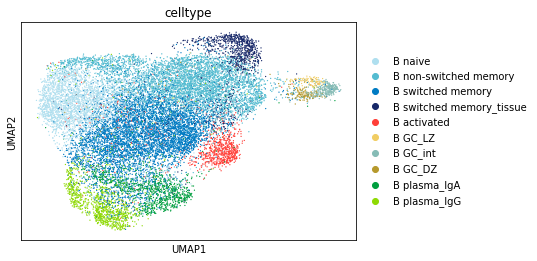

In [28]:
sc.pl.umap(b, color ='celltype')

In [30]:
from tools import returnDEres

In [31]:
sc.tl.rank_genes_groups(b, groupby = 'celltype', method = 'wilcoxon', n_genes = 30000)

In [122]:
genesets = {
#     'CD69': 'CD69',
    'B cell surface molecules':['CD40','CD80','CR1','CR2','FCGR2B','HLA-DRA','HLA-DRB1','HLA-DRB5','ICAM1','ITGAL','ITGB2','PTPRC'],
    'CD40 signaling':['CD40','CD40LG','CHUK','DUSP1','ELP1','IKBKB','IKBKG','MAP3K1','MAP3K14','NFKB1','NFKBIA','RELA','TNFAIP3','TRAF3','TRAF6'],
    'NF-kB signaling':['CHUK','FADD','IKBKB','IKBKG','IL1A','IL1R1','MAP3K1','MAP3K14','MAP3K7','MYD88','NFKB1','NFKBIA','RELA','RIPK1','TAB1','TNF','TNFAIP3','TNFRSF1A','TNFRSF1B','TRADD','TRAF6']}

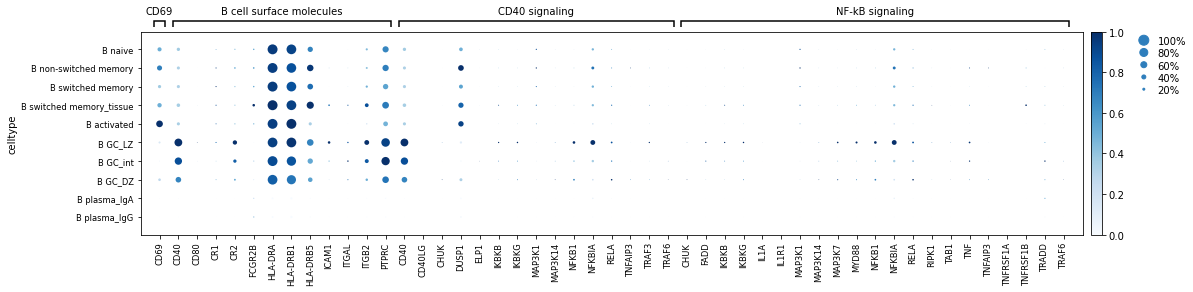

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[17.15, 0, 0.2, 0.5, 0.25])

In [119]:
sc.pl.dotplot(b, genesets, groupby = 'celltype', standard_scale = 'var', color_map ='Blues', var_group_rotation =0)

In [108]:
Bex = ['ALDH3B2','CR392000.1','AC098590.1','RBPMS2','IRX6','TBXT','AC133919.2','RN7SKP296','TMEM139','RPL31P7','USF1P1','AL513523.3','AC020661.4','AL135744.1','AL358075.4','AC020550.1','AC084756.1','SMOC2','BCL11B','RNU1-67P','AC025198.1','SUSD5','RNU4-50P','AL590099.1','AC091488.1','RHBDF1','AC069366.1','AC090152.1','AC011466.1','GRM7-AS2','MAL','TSBP1','MYT1','AC020915.1','NTNG1','AIRE','RNA5SP395','AC106782.4','RPL21P132','ALG1L3P','RPL21P75','RNA5SP532','RYR1','AC021739.1','MIR6069','RNU6-25P','RNU6-218P','RNU6-1042P','SNORD4B','MIR7161','AP003068.3','RNU6-80P','AL161420.1','AC211469.2','AC091805.1','AC009474.2','AL592295.2','RN7SL583P','AC011447.2','AL355796.1','RN7SKP273','AC093663.2','AC024595.1','CRYAA','AC084357.1','AC140479.3','AL133396.2','AC104078.2','RNU2-27P','AL121845.1','RPSAP51','CST6','MTCO3P1','ANOS1','AC022662.1','AC005618.2','SCGB2B3P','FAM207BP','AP000542.1','ABCB11','PAX9','RPL29P2','AC069528.1','AL162385.1','AC023442.3','AL132655.1','AC245884.4','AL353705.1','CRYAA2','AC096536.2','REEP1','ANKRD20A7P','MYL6P3','AC137800.1','AC112721.1','PALM2','AC108047.1','LRRC32','LINC02242','CCDC187','CENPUP2','AC104461.1','ALG1L13P','SYT1','SLC12A8','AC004494.1','CFAP45','CEBPG','AL158801.3','NRCAM','ROR2','ZNF683','RPL7P23','UBXN10','RANP3','RF02158','AC002366.1','AC074131.1','HSPB1','MEF2C-AS1','SYT11','BBS5','MFGE8','EVA1C','AC021945.1','VASH1-AS1','PDP2','ZNF449','SDC3','FGF2','AL590867.2','MIR593','MIR920','ULK4P1','RNU7-49P','AC092919.2','FTH1P5','AC093627.7','SHISA8','SNRK-AS1','RN7SKP239','NLRP4','AL590235.1','RNU6-1011P','PCDHGC3','FGD4','ARL4D','TSHZ2','MPZL1','COX17','AC008033.3','MS4A7','TATDN2P2','SMG7-AS1','ZYG11A','IFT27','ECT2L']

In [123]:
for g in genesets:
    sc.tl.score_genes(b, genesets[g], score_name=g, use_raw=True)

In [91]:
b.obs['celltype_cohort'] = [a +'_' + x for a,x in zip(b.obs['celltype'], b.obs['cohort'])]

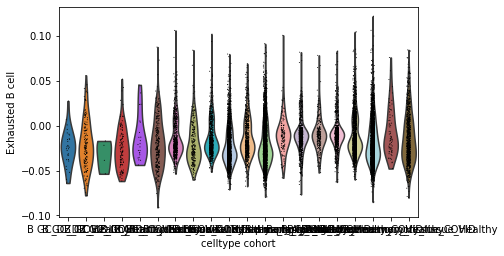

In [112]:
sc.pl.violin(b, ['Exhausted B cell'], groupby = 'celltype_cohort')

In [126]:
b.obs.drop('CD69', axis = 1, inplace = True)

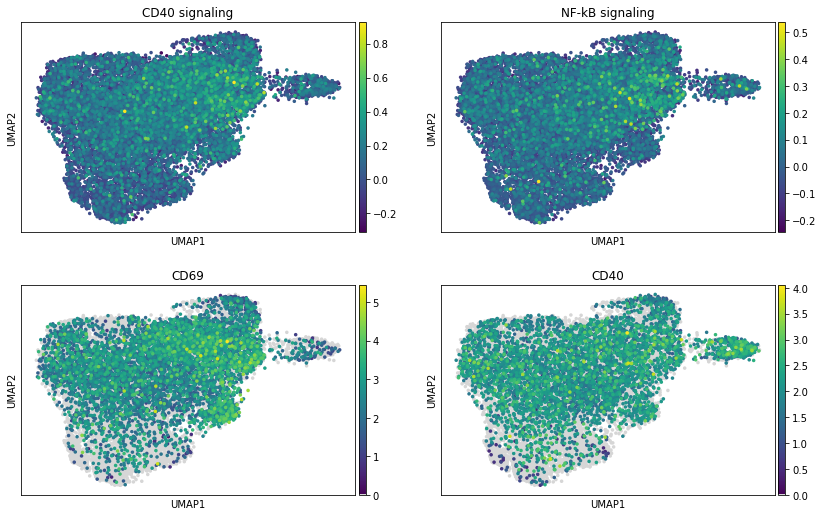

In [130]:
sc.pl.umap(b, color = ['CD40 signaling', 'NF-kB signaling', 'CD69', 'CD40'], color_map = newcmp, size = 50, ncols = 2)

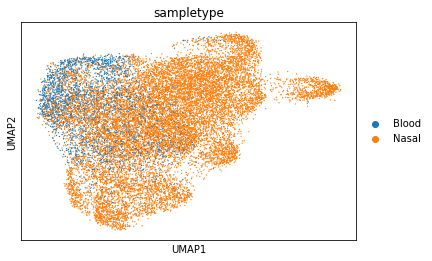

In [132]:
sc.pl.umap(b, color = ['sampletype'])

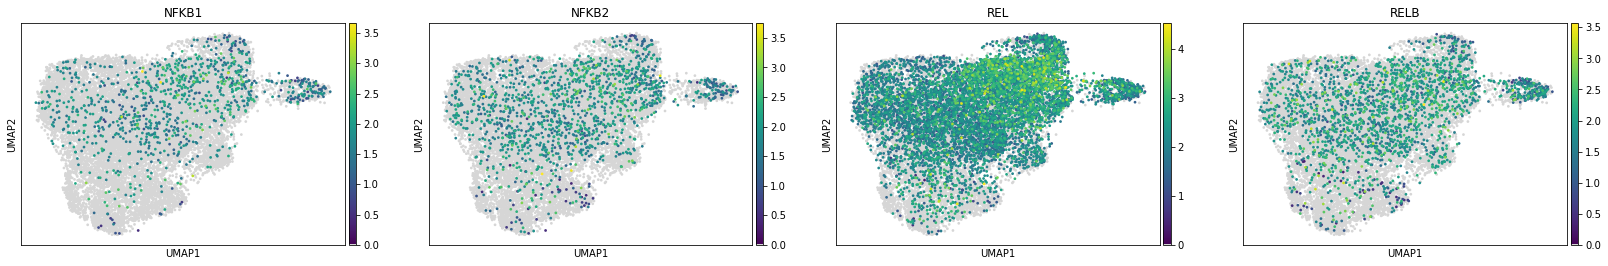

In [81]:
sc.pl.umap(b, color = ['NFKB1', 'NFKB2', 'REL', 'RELB'], color_map = newcmp, size = 30)

In [60]:
### run preranked GSEA
def rankList(adata, celltype, remove_ribo_mito = False):
    # read in the files and do some ranking calculations
    deg = returnDEres(adata, 'rank_genes_groups', celltype)
    if remove_ribo_mito:
        # remove ribosomal and mitochondrial genes
        deg = deg[~deg.index.str.contains('^RPS|^RPL|^MT-')]

    # convert to negative log10 pval
    deg['neglog10pval'] = [-1*np.log10(p) for p in deg['pvals']]
    # convert inf values to max machine number
    try:
        deg['neglog10pval'].replace(np.inf, -1*np.log10(10**-308), inplace = True)
    except:
        pass
    try:    
        deg['neglog10pval'].replace(-np.inf, -1*np.log10(10**308), inplace = True)
    except:
        pass
    deg['rank'] = [p*np.sign(lfc) for p, lfc in zip(deg['neglog10pval'], deg['logfoldchanges'])]
    deg = deg.reset_index(drop = False)
    return(deg[['index', 'rank']])

In [72]:
from tools import exportDEres
exportDEres(b, key='rank_genes_groups', column='B activated', filename='test/B activated deg.txt')

In [38]:
rnk = rankList(b, 'B activated')

In [35]:
import gseapy as gp

In [36]:
names = gp.get_library_name() # default: Human

In [37]:
names

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'Cancer_Cell_Line_Encyclopedia',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbations_from_GEO_up',
 'Disease_Signatures_from_GEO_down_2014',
 'Disease_Signatures_from_GEO_up_2014',
 'DrugMatrix',
 'Drug_Perturbations_from_GEO_2014',
 'Drug_Perturbations

In [64]:
pre_res1 = gp.prerank(rnk=rnk, gene_sets='MSigDB_Hallmark_2020',
                     processes=20,
                     permutation_num=100, # reduce number to speed up testing
                     outdir='test/prerank_report_hallmark', format='png', seed=6, no_plot=True)

In [67]:
pre_res1.res2d

es       nes      pval       fdr  \
Term                                                                        
heme Metabolism                   -0.779206 -1.485210  0.000000  0.062353   
G2-M Checkpoint                   -0.736739 -1.393628  0.026667  0.095756   
Angiogenesis                      -0.808407 -1.318735  0.037975  0.113818   
Hedgehog Signaling                -0.872042 -1.430607  0.024390  0.120252   
Apical Surface                    -0.803535 -1.320768  0.060976  0.124705   
Coagulation                       -0.754697 -1.394128  0.012821  0.127674   
Protein Secretion                 -0.798922 -1.323329  0.000000  0.137430   
Unfolded Protein Response         -0.774504 -1.328858  0.027027  0.145489   
Mitotic Spindle                   -0.754660 -1.332468  0.000000  0.171024   
Complement                        -0.680970 -1.274221  0.054795  0.176369   
Xenobiotic Metabolism             -0.655016 -1.195420  0.160494  0.361782   
Pperoxisome                       -0.696082 -1.207536  0.137500  0.378974   
Estrogen Response Early           -0.662079 -1.197558  0.088608  0.381539   
Glycolysis                         0.534289  1.030992  0.437500  0.543252   
Apoptosis                          0.558339  1.032238  0.375000  0.591409   
Cholesterol Homeostasis           -0.655758 -1.117469  0.317647  0.609608   
Inflammatory Response              0.538076  0.954468  0.571429  0.613824   
Spermatogenesis                   -0.644305 -1.097297  0.319444  0.619073   
Epithelial Mesenchymal Transition  0.557144  1.043549  0.315789  0.620795   
UV Response Up                    -0.602732 -1.105505  0.338028  0.621430   
IL-6/JAK/STAT3 Signaling           0.552803  0.915984  0.483871  0.623113   
IL-2/STAT5 Signaling               0.470941  0.886956  0.678571  0.627557   
Reactive Oxygen Species Pathway   -0.665635 -1.121742  0.246575  0.630059   
Wnt-beta Catenin Signaling        -0.675956 -1.126778  0.233766  0.648976   
KRAS Signaling Up                  0.548706  1.063133  0.208333  0.662722   
p53 Pathway                        0.443288  0.832990  0.666667  0.672866   
E2F Targets                       -0.583310 -1.064737  0.376623  0.676971   
Allograft Rejection               -0.586313 -1.068570  0.363636  0.698537   
Interferon Alpha Response         -0.593306 -1.039414  0.500000  0.730841   
TNF-alpha Signaling via NF-kB      0.593715  1.064570  0.375000  0.742181   
PI3K/AKT/mTOR  Signaling           0.615640  1.103272  0.277778  0.751600   
Bile Acid Metabolism              -0.573282 -1.002967  0.544304  0.771469   
Estrogen Response Late            -0.543362 -1.013448  0.480519  0.774144   
Adipogenesis                      -0.518121 -0.975372  0.520000  0.776379   
TGF-beta Signaling                -0.595243 -0.978744  0.653333  0.802419   
Pancreas Beta Cells                0.744522  1.125146  0.363636  0.820513   
Fatty Acid Metabolism             -0.460036 -0.855016  0.777778  0.831847   
UV Response Dn                    -0.479284 -0.873506  0.746988  0.831962   
Myogenesis                        -0.487242 -0.888259  0.742857  0.833928   
mTORC1 Signaling                  -0.485133 -0.898637  0.621622  0.845578   
DNA Repair                        -0.507899 -0.912908  0.671053  0.848854   
Apical Junction                   -0.421584 -0.796889  0.833333  0.864299   
KRAS Signaling Dn                 -0.494536 -0.920119  0.720000  0.868483   
Myc Targets V1                    -0.434454 -0.770335  0.952381  0.874771   
Androgen Response                 -0.455209 -0.804037  0.853333  0.882401   
Hypoxia                            0.657737  1.127447  0.307692  0.968385   
Interferon Gamma Response          0.646734  1.200858  0.142857  1.000000   
Myc Targets V2                     0.864454  1.344124  0.173913  1.000000   
Oxidative Phosphorylation          0.593398  1.186575  0.192308  1.000000   
Notch Signaling                    0.671802  1.130014  0.260870  1.000000   

                                   g

In [71]:
glist

['AC245014.3',
 'WDR74',
 'CD69',
 'AC103591.3',
 'HLA-DRB1',
 'CXCR4',
 'TMSB4X',
 'TMEM107',
 'JUN',
 'PTMA',
 'Z93241.1',
 'TSC22D3',
 'KLF6',
 'BTG1',
 'FAU',
 'ACTB',
 'PTCH2',
 'ATP5F1E',
 'UBA52',
 'C12orf57',
 'VPREB3',
 'H3F3B',
 'DUSP1',
 'LSM7',
 'CD52',
 'TMA7',
 'MEF2C',
 'RHOB',
 'HLA-DQA1',
 'TCL1A',
 'PFDN5',
 'COX6C',
 'TMSB10',
 'HNRNPDL',
 'EEF1B2',
 'RBM3',
 'STAG3',
 'HLA-DPA1',
 'PPIA',
 'CFL1',
 'PFN1',
 'COX7C',
 'MALAT1',
 'EIF3E',
 'IFITM2',
 'MYL12A',
 'EEF1A1',
 'HLA-DRA',
 'ATP5MPL',
 'BTF3',
 'CIRBP',
 'CHCHD10',
 'AC007952.4',
 'MIF',
 'COMMD6',
 'ATP5MD',
 'HIST2H2AA4',
 'SRP14',
 'LTB',
 'CALM2',
 'ARPC3',
 'HNRNPA1',
 'SMIM14',
 'TOMM7',
 'PCBP2',
 'SKP1',
 'NDUFB1',
 'PRR13',
 'HIST1H1E',
 'ANAPC16',
 'EIF1AY',
 'ATP5ME',
 'SNHG8',
 'TRMT112',
 'HMGB1',
 'IFITM1',
 'KMT2E-AS1',
 'ZFAS1',
 'HMGN1',
 'KLF2',
 'STK17A',
 'COX6A1',
 'RNASE6',
 'SUMO2',
 'HMGN2',
 'CD79B',
 'TRBC2',
 'PET100',
 'TSTD1',
 'DAZAP2',
 'AC025164.1',
 'AC087239.1',
 'NDUFA3',
 

In [ ]:
# pre_res3 = gp.prerank(rnk=rnk, gene_sets='KEGG_2019_Human',
#                      processes=20,
#                      permutation_num=100, # reduce number to speed up testing
#                      outdir='test/prerank_report_kegg', format='png', seed=6)

In [ ]:
# pre_res2 = gp.prerank(rnk=rnk, gene_sets='COVID-19_Related_Gene_Sets',
#                      processes=20,
#                      permutation_num=100, # reduce number to speed up testing
#                      outdir='test/prerank_report_covid', format='png', seed=6)

In [51]:
from gseapy.plot import barplot, dotplot

In [45]:
degs = returnDEres(b, 'rank_genes_groups', 'B activated')
degs

scores  logfoldchanges          pvals      pvals_adj
AC245014.3  26.910334        5.228705  1.662510e-159  1.102273e-155
WDR74       21.978380        3.235936  4.637222e-107  1.043282e-103
CD69        18.617548        1.918707   2.315791e-77   3.256291e-74
AC103591.3  18.093967        5.327431   3.555449e-73   4.210026e-70
HLA-DRB1    17.993357        1.074358   2.196433e-72   2.470767e-69
...               ...             ...            ...            ...
HSPA8       -9.838573       -0.887394   7.679249e-23   2.617693e-20
BTG2       -10.614741       -1.525031   2.544995e-26   1.004514e-23
HLA-C      -10.716089       -0.828396   8.554412e-27   3.564022e-24
HLA-DRB5   -12.668337       -1.410956   8.857250e-37   4.428231e-34
EEF2       -17.236740       -1.353785   1.407515e-66   1.319428e-63

[22305 rows x 4 columns]

In [61]:
deg2 = degs[(degs['pvals_adj'] < 0.05) & (degs['logfoldchanges'] > np.log2(1.25))]
deg2 = deg2[~deg2.index.str.contains('^RPS|^RPL|^MT-')]
glist =list(deg2.index)

In [62]:
# list, dataframe, series inputs are supported
enr = gp.enrichr(gene_list=glist,
                 gene_sets=['GO_Biological_Process_2018'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 description='GO_B_activated',
                 outdir='test/enrichr_GO',
                 # no_plot=True,
                 cutoff=0.05 # test dataset, use lower value from range(0,1)
                )

In [54]:
# list, dataframe, series inputs are supported
enr = gp.enrichr(gene_list=glist,
                 gene_sets=['KEGG_2019_Human'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 description='reactome_B_activated',
                 outdir='test/enrichr_kegg',
                 # no_plot=True,
                 cutoff=0.05 # test dataset, use lower value from range(0,1)
                )

<AxesSubplot:title={'center':'GO'}, xlabel='-log$_{10}$(Adjusted P-value)'>

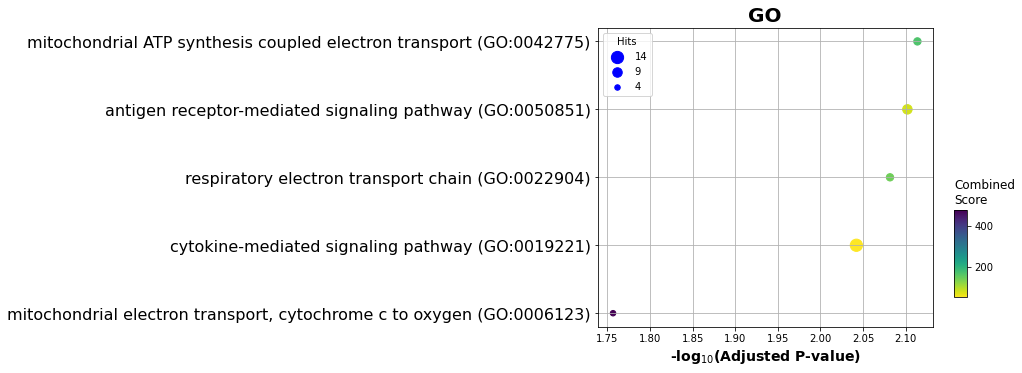

In [63]:
dotplot(enr.res2d, title='GO',cmap='viridis_r')